# Data Loading

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np
from datetime import datetime

In [ ]:
SEED=42

In [ ]:
# !gdown https://drive.google.com/uc?id=1kl65YOvoSAMSgszQQbua2q4Zwe1HgPct
# !unzip -o "data.zip"  -d  "/content"

# movie_10k_df = pd.read_csv("movies_min.csv")
# amazon_df =pd.read_csv('amazon_min.csv')
# book_df=pd.read_csv("book_min.csv")
# food_df = pd.read_csv('food_min.csv')
# ecommerce_df=pd.read_csv('ecom_min.csv')
# ciao_df=pd.read_csv('ciao_min.csv')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt


Downloading...
From: https://drive.google.com/uc?id=1Z7TljjdpUOHdxUdS2GiJMGdmMJ8hbCRt
To: /content/fashon.zip
100% 593M/593M [00:06<00:00, 89.4MB/s]


In [ ]:
!unzip -o "fashon.zip"  -d  "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/myntradataset/images/5813.jpg  
  inflating: /content/myntradataset/images/58131.jpg  
  inflating: /content/myntradataset/images/58132.jpg  
  inflating: /content/myntradataset/images/58133.jpg  
  inflating: /content/myntradataset/images/58135.jpg  
  inflating: /content/myntradataset/images/58136.jpg  
  inflating: /content/myntradataset/images/58137.jpg  
  inflating: /content/myntradataset/images/58138.jpg  
  inflating: /content/myntradataset/images/58139.jpg  
  inflating: /content/myntradataset/images/5814.jpg  
  inflating: /content/myntradataset/images/58140.jpg  
  inflating: /content/myntradataset/images/58141.jpg  
  inflating: /content/myntradataset/images/58143.jpg  
  inflating: /content/myntradataset/images/58144.jpg  
  inflating: /content/myntradataset/images/58145.jpg  
  inflating: /content/myntradataset/images/58146.jpg  
  inflating: /content/myntradataset/images/58147.jpg  
  inflating: /co

#### Name of the file where user item interaction data avaiable?
- Column name should be in following name and order
- [ **id, [featues]** ]
- **id** should be name of **image**.Images are named as **id.jpeg**

In [ ]:
filename="myntradataset/styles.csv" #enter your filename with file path

In [ ]:
imagepath="myntradataset/images/"

### Code Setup

In [ ]:
item_df = pd.read_csv(filename,on_bad_lines='skip')


In [ ]:
item_df.head(1)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt


name of itemid

In [ ]:
itemid='id'

In [ ]:
features=['gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName']

In [ ]:
item_df['image'] = item_df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
item_df['image'] =imagepath+item_df['image'] 
item_df = item_df.reset_index(drop=True)

#Code

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

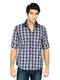

In [ ]:
import cv2
from IPython.display import display, Image
imagename=item_df['image'][0]
display(Image(filename=imagename))


#  TRANSFORMER

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=7e8e5c088dd78a6aea68f1cc9680dd9f184342bb8a0ba7697923d41b8203866e
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


###Load CLIP model

In [ ]:
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
import cv2
import PIL
from IPython.display import display, Image
torch.set_num_threads(4)

#First, we load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')

In [ ]:

use_precomputed_embeddings = False

In [ ]:
img_names = list(glob.glob('images/*.jpg'))
print("Images:", len(img_names))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


Images: 44441


Batches:   0%|          | 0/348 [00:00<?, ?it/s]

# Search 

In [ ]:

def searchimage(query, k=3):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    
    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(img_names[hit['corpus_id']], width=200))


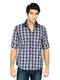

Query:


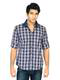

images/15970.jpg


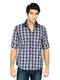

images/16047.jpg


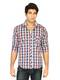

images/12193.jpg


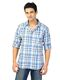

images/12469.jpg


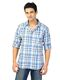

images/27546.jpg


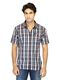

images/16303.jpg


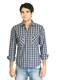

images/15972.jpg


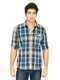

images/16408.jpg


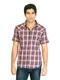

images/9646.jpg


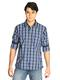

images/8741.jpg


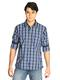

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchimage(PIL.Image.open(imagename), k=10)

# Search with FAISS

In [ ]:
!pip install faiss-cpu
!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 72.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.7 MB/s eta 0:00:00


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
images_list=list(glob.glob('images/*.jpg'))

In [ ]:

print("Images:", len(images_list))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in images_list], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


Images: 44441


Batches:   0%|          | 0/348 [00:00<?, ?it/s]

In [ ]:

encoded_data = np.asarray(img_emb.cpu())
index = faiss.IndexIDMap(faiss.IndexFlatIP(encoded_data.shape[1]))


In [ ]:
index.add_with_ids(encoded_data, np.array(range(0, len(images_list))))
faiss.write_index(index, 'item.index')

### fetch details of the document

In [ ]:

def searchfaiss(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for i in results:
      display(Image(filename=i))
    return results

### search

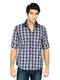

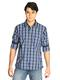

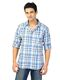

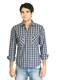

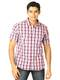

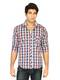

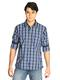

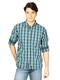

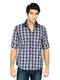

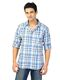

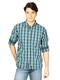

['images/8741.jpg',
 'images/12469.jpg',
 'images/16303.jpg',
 'images/9594.jpg',
 'images/16047.jpg',
 'images/9646.jpg',
 'images/8742.jpg',
 'images/15970.jpg',
 'images/12193.jpg',
 'images/9647.jpg']

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)

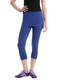

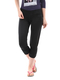

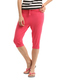

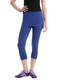

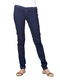

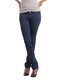

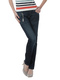

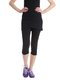

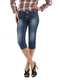

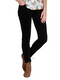

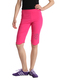

['images/3483.jpg',
 'images/51993.jpg',
 'images/28456.jpg',
 'images/7189.jpg',
 'images/51586.jpg',
 'images/52554.jpg',
 'images/28455.jpg',
 'images/51361.jpg',
 'images/48497.jpg',
 'images/28460.jpg']

In [ ]:
imagename=item_df['image'][100]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)
